# **IMPORT LIBRARY AND DATA**

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA, IncrementalPCA

import plotly.express as px
!pip install -U kaleido
import kaleido

In [323]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [324]:
data = pd.read_csv('/content/drive/MyDrive/Country-data.csv')
data_dict = pd.read_csv('/content/drive/MyDrive/data-dictionary.csv')

In [325]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [326]:
data_dict

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


In [327]:
data.shape

(167, 10)

In [328]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

No missing values

In [329]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [330]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [331]:
columns = data.columns
columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [332]:
features_categorical =  [i for i in data.columns if i not in ['child_mort',	'exports',	'health',	'imports',	'income',	'inflation',	'life_expec',	'total_fer',	'gdpp']]
features_numerical = [i for i in data.columns if i not in ['country']]

In [333]:
features_categorical

['country']

In [334]:
features_numerical

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

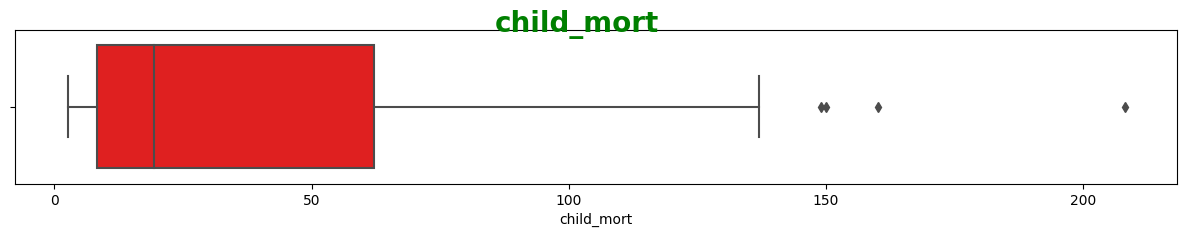

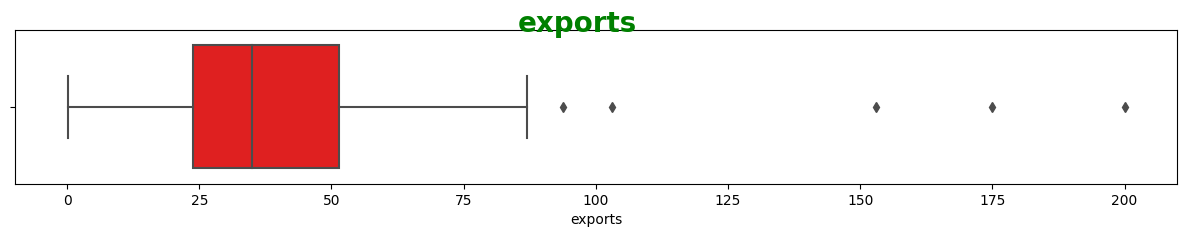

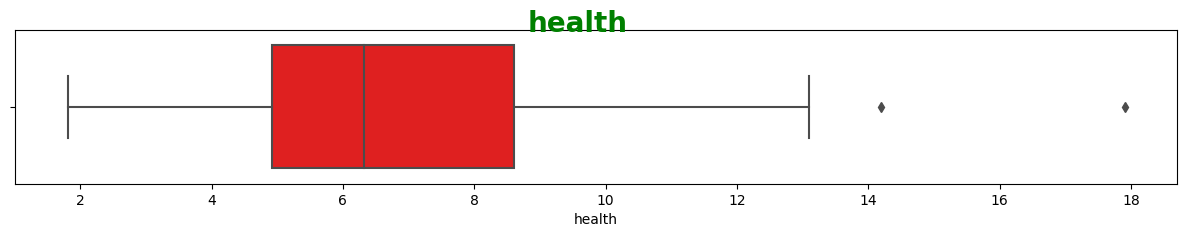

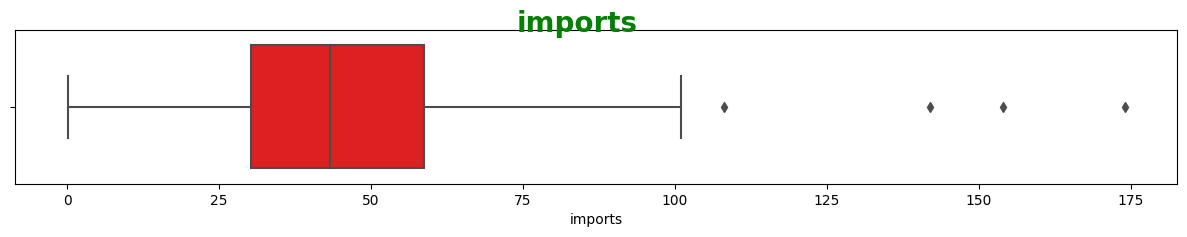

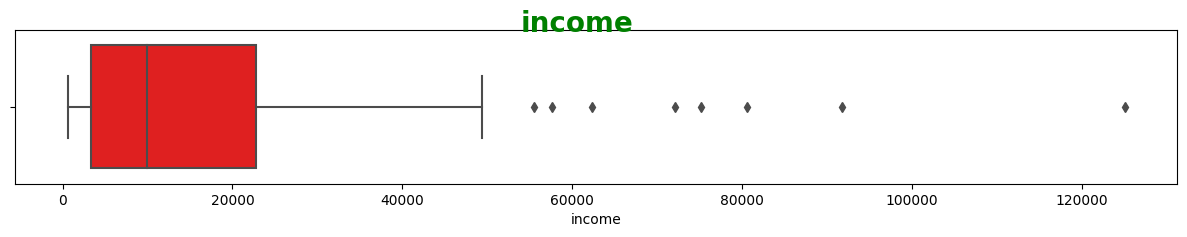

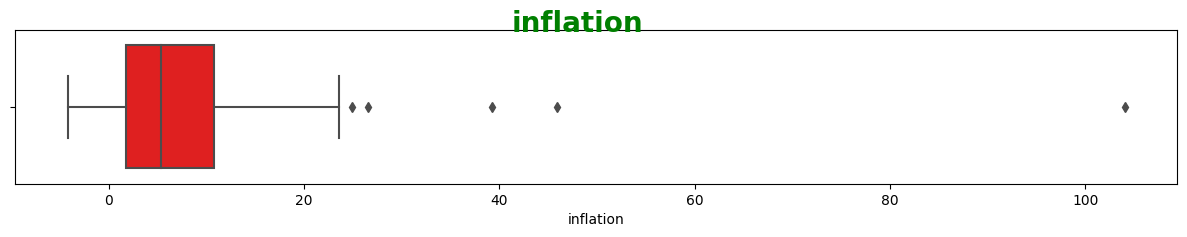

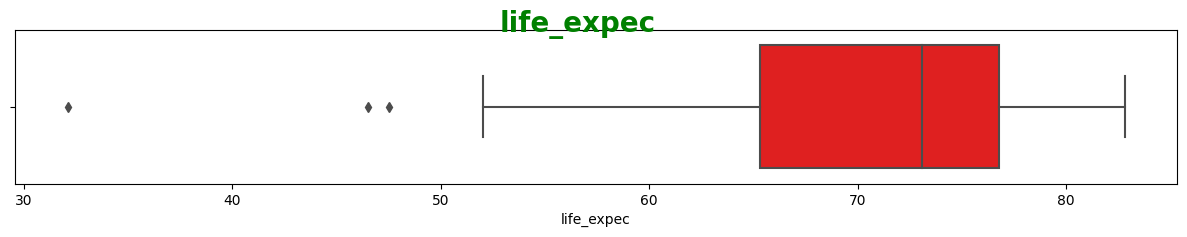

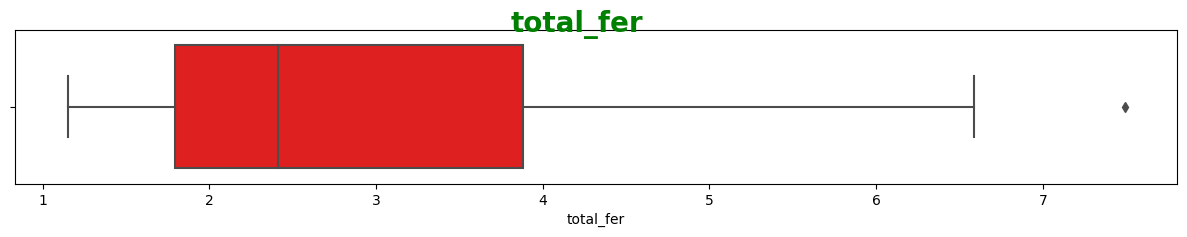

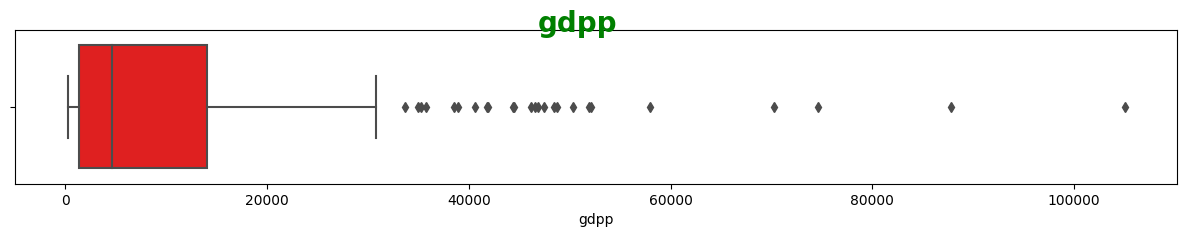

In [335]:
for i in range(1, 10):
    fig, ax = plt.subplots(figsize=(15, 2))
    plt.suptitle(columns[i], fontsize=20, fontweight='bold', color='green')
    sns.boxplot(x=columns[i], data=data, ax=ax, color="red")
    plt.show()


<ipython-input-336-1238aaab819e>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




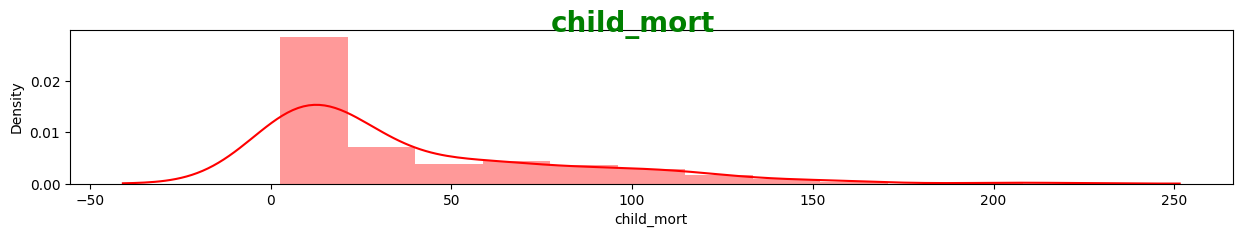

<ipython-input-336-1238aaab819e>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




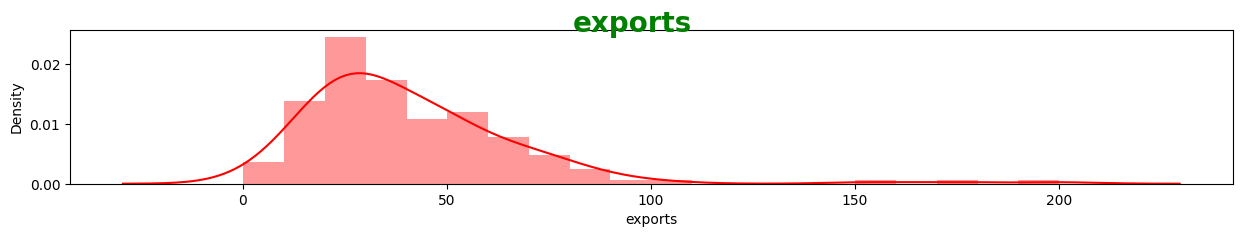

<ipython-input-336-1238aaab819e>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




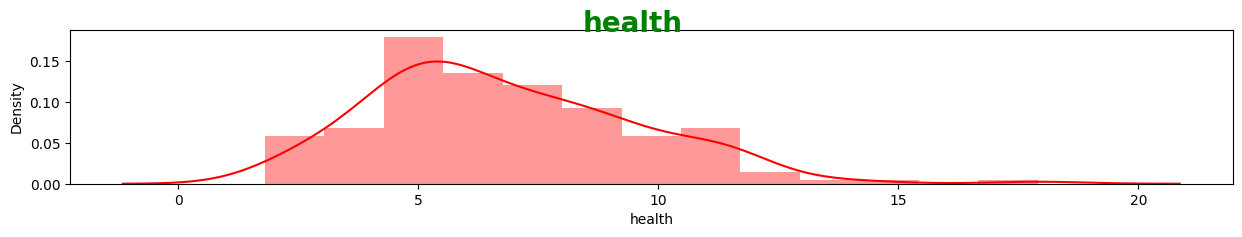

<ipython-input-336-1238aaab819e>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




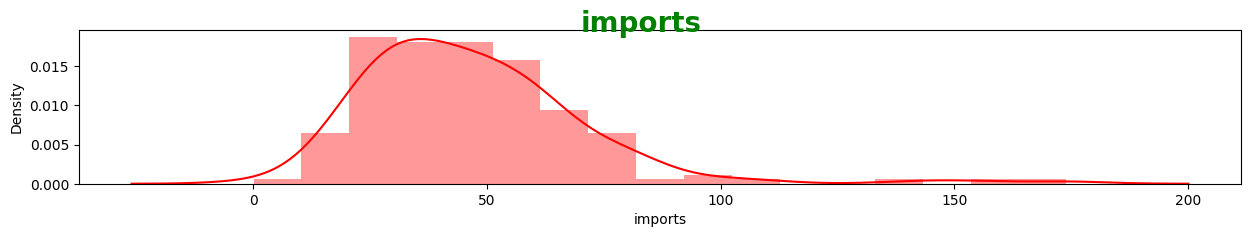

<ipython-input-336-1238aaab819e>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




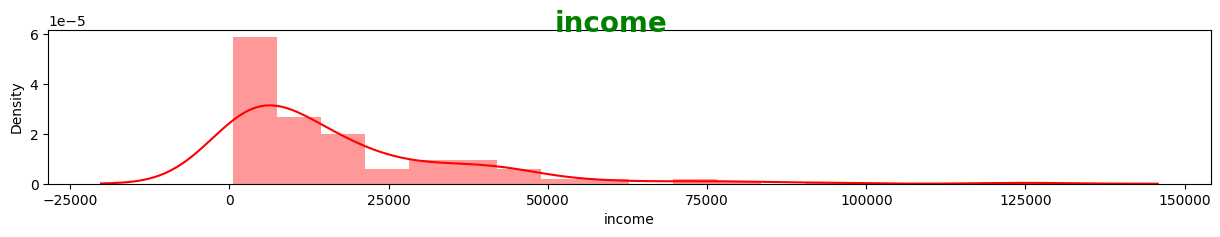

<ipython-input-336-1238aaab819e>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




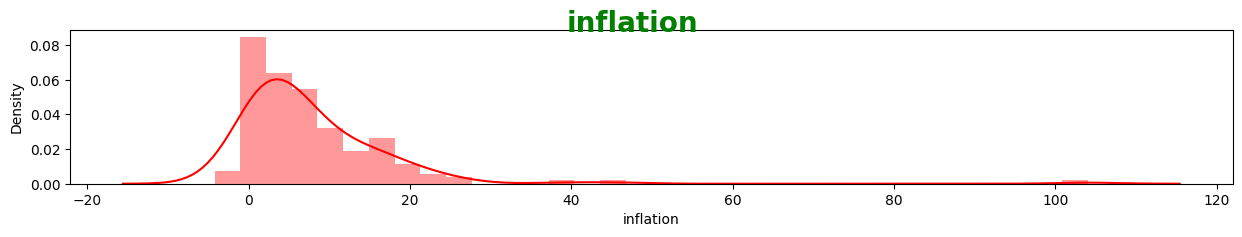

<ipython-input-336-1238aaab819e>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




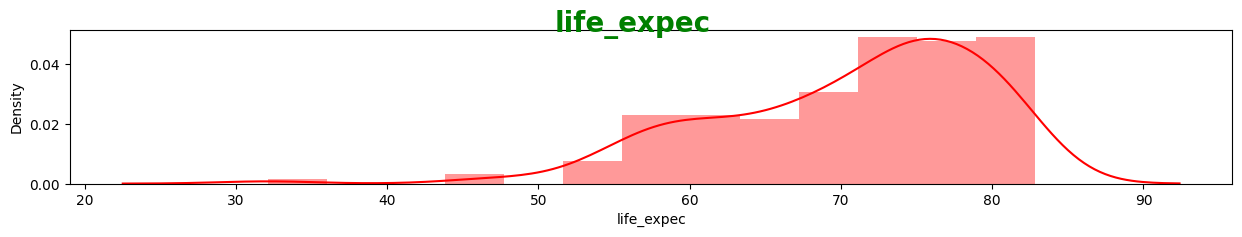

<ipython-input-336-1238aaab819e>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




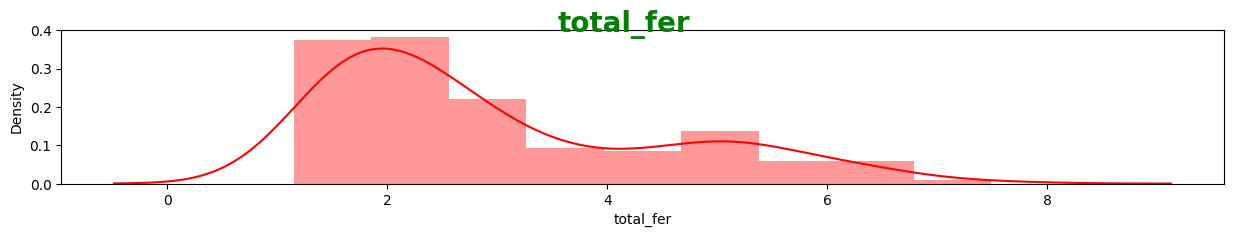

<ipython-input-336-1238aaab819e>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




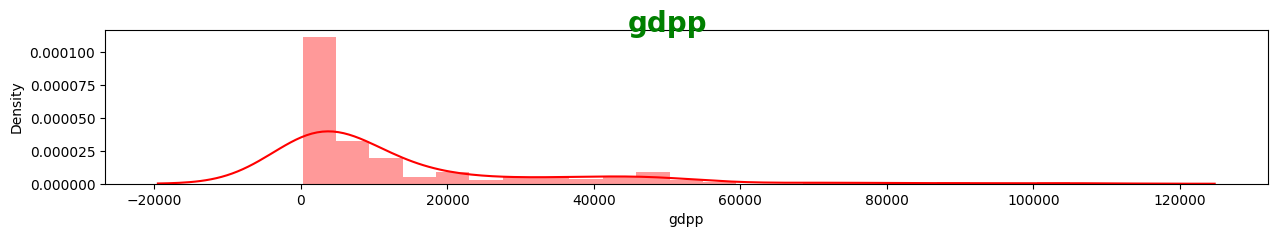

In [336]:
for i in range(1, 10):
    fig, ax = plt.subplots(figsize=(15, 2))
    plt.suptitle(columns[i], fontsize=20, fontweight='bold', color='green')
    sns.distplot(data[columns[i]], ax=ax, color="red")
    plt.show()


There is outlier on the data but we dont want to remove them because it might contain important information.

life_expec is a negatively skewed data distribution because the left tail is longer than then right tail.

all of the remaining data have a positively skewed data distribution

<ipython-input-337-5dc0886d4b6b>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

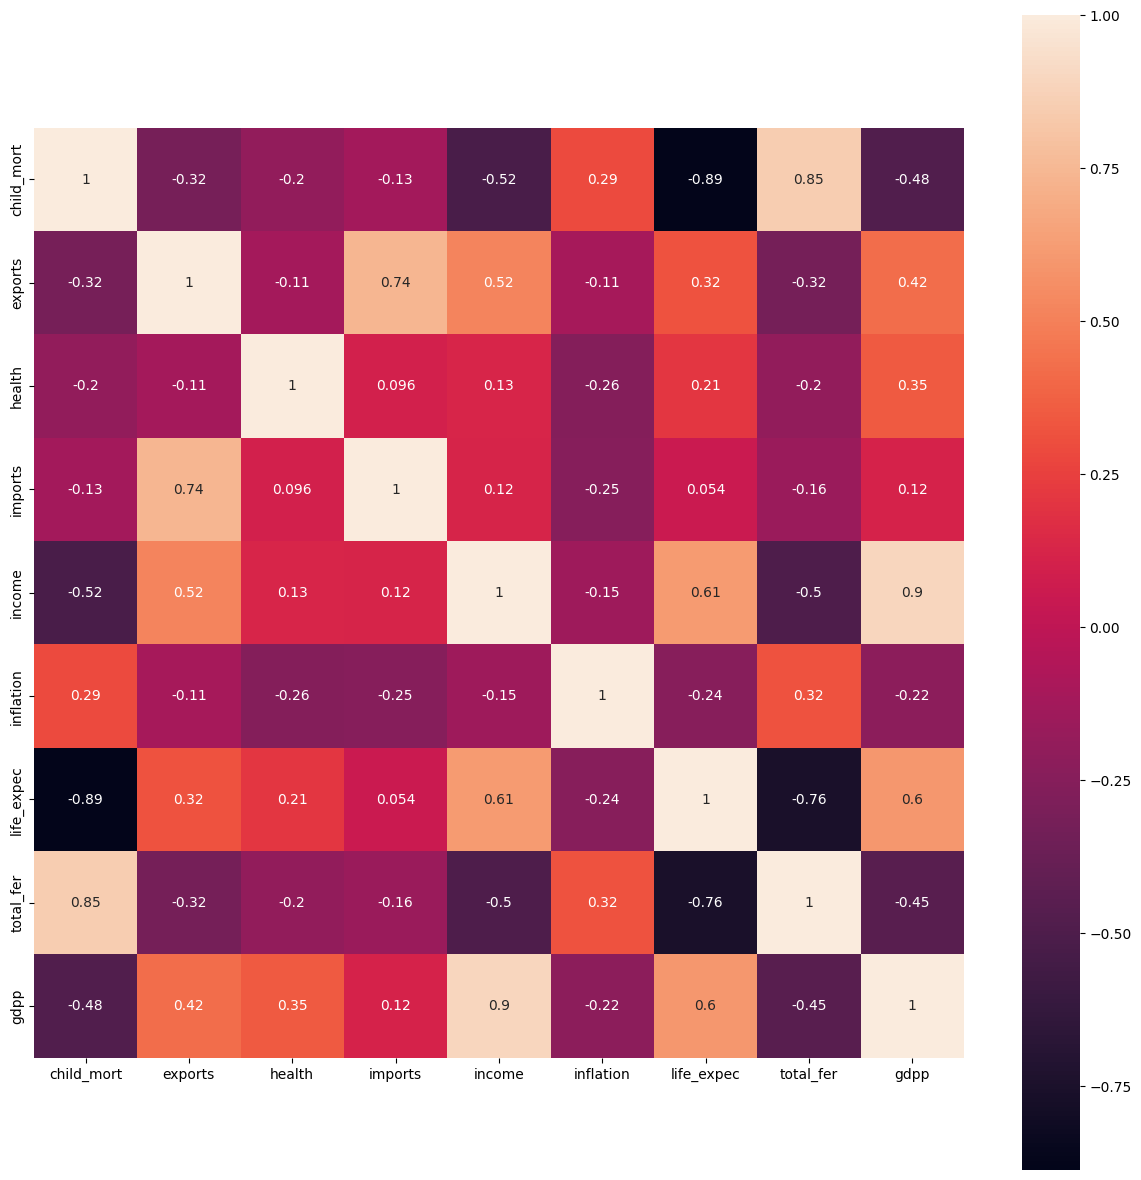

In [337]:

plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,square=True)

 Greatly correlated columns were:



**child_mort & total_fer : 0.85**

**income $ gdpp : 0.90**

**life_expec & child_mort : -0.89**


Normalization

In [338]:
df = data.drop(columns='country', inplace=False)

scaler = MinMaxScaler().fit_transform(df)
df_norm = pd.DataFrame(scaler, columns=df.columns)

In [339]:
df_norm

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


PCA

In [340]:
pca = PCA(n_components=9).fit(df_norm)
variance = pca.explained_variance_ratio_
print(variance)

[0.55001227 0.13384784 0.12301053 0.09749047 0.03777964 0.03013659
 0.01190434 0.00887791 0.00694042]


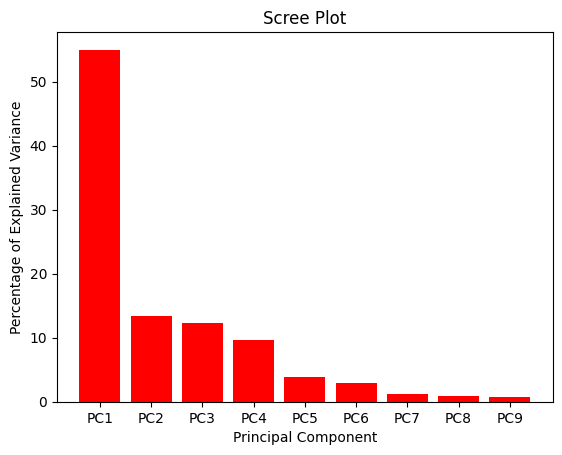

In [341]:

per_var = np.round(pca.explained_variance_ratio_*100, decimals =1)
labels = ['PC' + str(x) for x in range (1, len(per_var)+1)]


plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label = labels, color = 'red')
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

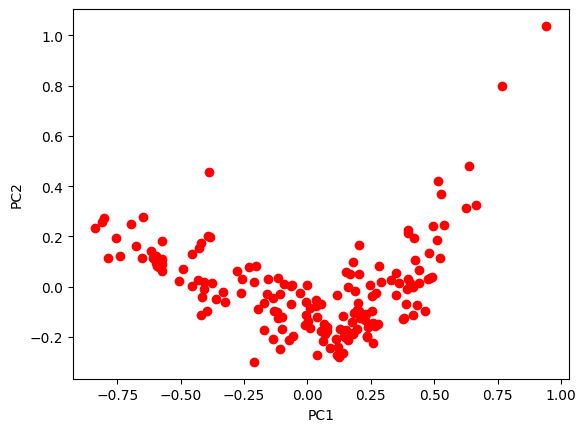

In [342]:
PCA_transformed = PCA(n_components=5).fit_transform(df_norm)
plt.scatter(PCA_transformed[:, 0], PCA_transformed[:, 1], color = 'red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

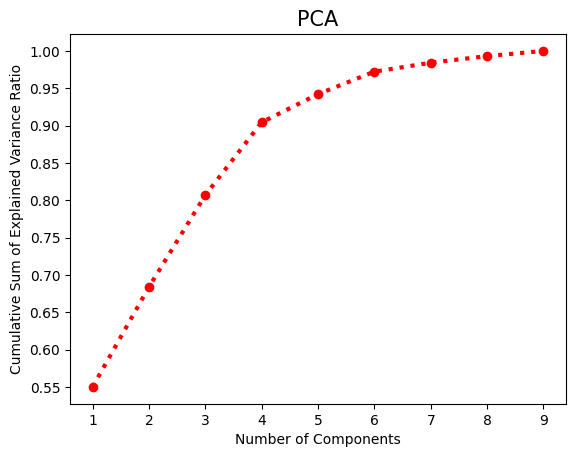

In [343]:
components = np.arange(1, len(variance) + 1)

plt.plot(components, np.cumsum(variance), linewidth=3, marker='o', linestyle='dotted', color='red')

plt.title("PCA", fontsize=15)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Sum of Explained Variance Ratio')

plt.yticks(np.arange(0.55, 1.05, 0.05))

plt.show()

Number of components = 5 contains 94% information that explains the data distribution

In [344]:
increment_pca = IncrementalPCA(n_components=5).fit_transform(df_norm)
pcs = np.transpose(increment_pca)

In [345]:
df_pcs = pd.DataFrame({'PC1':pcs[0], 'PC2':pcs[1], 'PC3':pcs[2], 'PC4':pcs[3],'PC5':pcs[4],})

In [346]:
df_pcs

,PC1,PC2,PC3,PC4,PC5
0,0.599065,0.095506,0.157437,0.024382,0.042560
1,-0.158455,-0.212345,-0.063709,0.061067,-0.017134
2,-0.003661,-0.135842,-0.133938,-0.133376,0.092225
3,0.650272,0.276016,-0.143024,-0.155593,0.083921
4,-0.200684,-0.065162,-0.100418,0.037680,0.030574
...,...,...,...,...,...
162,0.160056,-0.030100,-0.121936,0.065807,0.007747
163,-0.061196,-0.169616,-0.058942,-0.245296,0.112279
164,-0.115510,-0.032083,-0.195224,0.232604,0.040592
165,0.332967,-0.019417,-0.030055,-0.104661,0.145588


In [347]:
df_pcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     167 non-null    float64
 1   PC2     167 non-null    float64
 2   PC3     167 non-null    float64
 3   PC4     167 non-null    float64
 4   PC5     167 non-null    float64
dtypes: float64(5)
memory usage: 6.6 KB


In [348]:
import random


data_kmeans = df_pcs.values.tolist()

k = 3
centroids = random.sample(data_kmeans, k)

def euclidean_distance(a, b):
    return sum((x - y) ** 2 for x, y in zip(a, b)) ** 0.5

while True:

    labels = []
    clusters = [[] for _ in range(k)]
    for point in data_kmeans:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        closest_centroid_index = distances.index(min(distances))
        labels.append(closest_centroid_index)
        clusters[closest_centroid_index].append(point)


    new_centroids = [list(np.mean(cluster, axis=0)) for cluster in clusters]


    if new_centroids == centroids:
        break
    else:
        centroids = new_centroids

labels_df = pd.DataFrame({'Cluster': labels})

df_with_labels = pd.concat([df_pcs, labels_df], axis=1)

print("Final centroids:", centroids)
print("DataFrame with assigned labels:")
print(df_with_labels)


Final centroids: [[-0.47324866641333846, 0.14480852111866166, 0.11965444122560707, -0.0560943843427933, -0.009161150316732274], [-0.07613640616721414, -0.11130737167570452, -0.07389016127884566, 0.02644497834349005, 0.00044142856613568407], [0.5024224838010273, 0.09791599402081382, 0.047101052762706035, -0.0067601018596170235, 0.006145160965173094]]
DataFrame with assigned labels:
          PC1       PC2       PC3       PC4       PC5  Cluster
0    0.599065  0.095506  0.157437  0.024382  0.042560        2
1   -0.158455 -0.212345 -0.063709  0.061067 -0.017134        1
2   -0.003661 -0.135842 -0.133938 -0.133376  0.092225        1
3    0.650272  0.276016 -0.143024 -0.155593  0.083921        2
4   -0.200684 -0.065162 -0.100418  0.037680  0.030574        1
..        ...       ...       ...       ...       ...      ...
162  0.160056 -0.030100 -0.121936  0.065807  0.007747        1
163 -0.061196 -0.169616 -0.058942 -0.245296  0.112279        1
164 -0.115510 -0.032083 -0.195224  0.232604  0.04

In [349]:
np.unique(df_with_labels['Cluster'])

array([0, 1, 2])

In [350]:
df_with_labels.shape

(167, 6)

In [351]:
df_with_labels.insert(0, 'Country', data['country'])

In [352]:
df_with_labels

,Country,PC1,PC2,PC3,PC4,PC5,Cluster
0,Afghanistan,0.599065,0.095506,0.157437,0.024382,0.042560,2
1,Albania,-0.158455,-0.212345,-0.063709,0.061067,-0.017134,1
2,Algeria,-0.003661,-0.135842,-0.133938,-0.133376,0.092225,1
3,Angola,0.650272,0.276016,-0.143024,-0.155593,0.083921,2
4,Antigua and Barbuda,-0.200684,-0.065162,-0.100418,0.037680,0.030574,1
...,...,...,...,...,...,...,...
162,Vanuatu,0.160056,-0.030100,-0.121936,0.065807,0.007747,1
163,Venezuela,-0.061196,-0.169616,-0.058942,-0.245296,0.112279,1
164,Vietnam,-0.115510,-0.032083,-0.195224,0.232604,0.040592,1
165,Yemen,0.332967,-0.019417,-0.030055,-0.104661,0.145588,2


In [363]:
df_norm['Cluster'] = df_with_labels['Cluster']

In [364]:
df_norm

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073,2
1,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833,1
2,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365,1
3,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488,2
4,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242,1
...,...,...,...,...,...,...,...,...,...,...
162,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143,1
163,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650,1
164,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299,1
165,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299,2


In [365]:
data['Cluster'] = df_with_labels['Cluster']

In [366]:
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


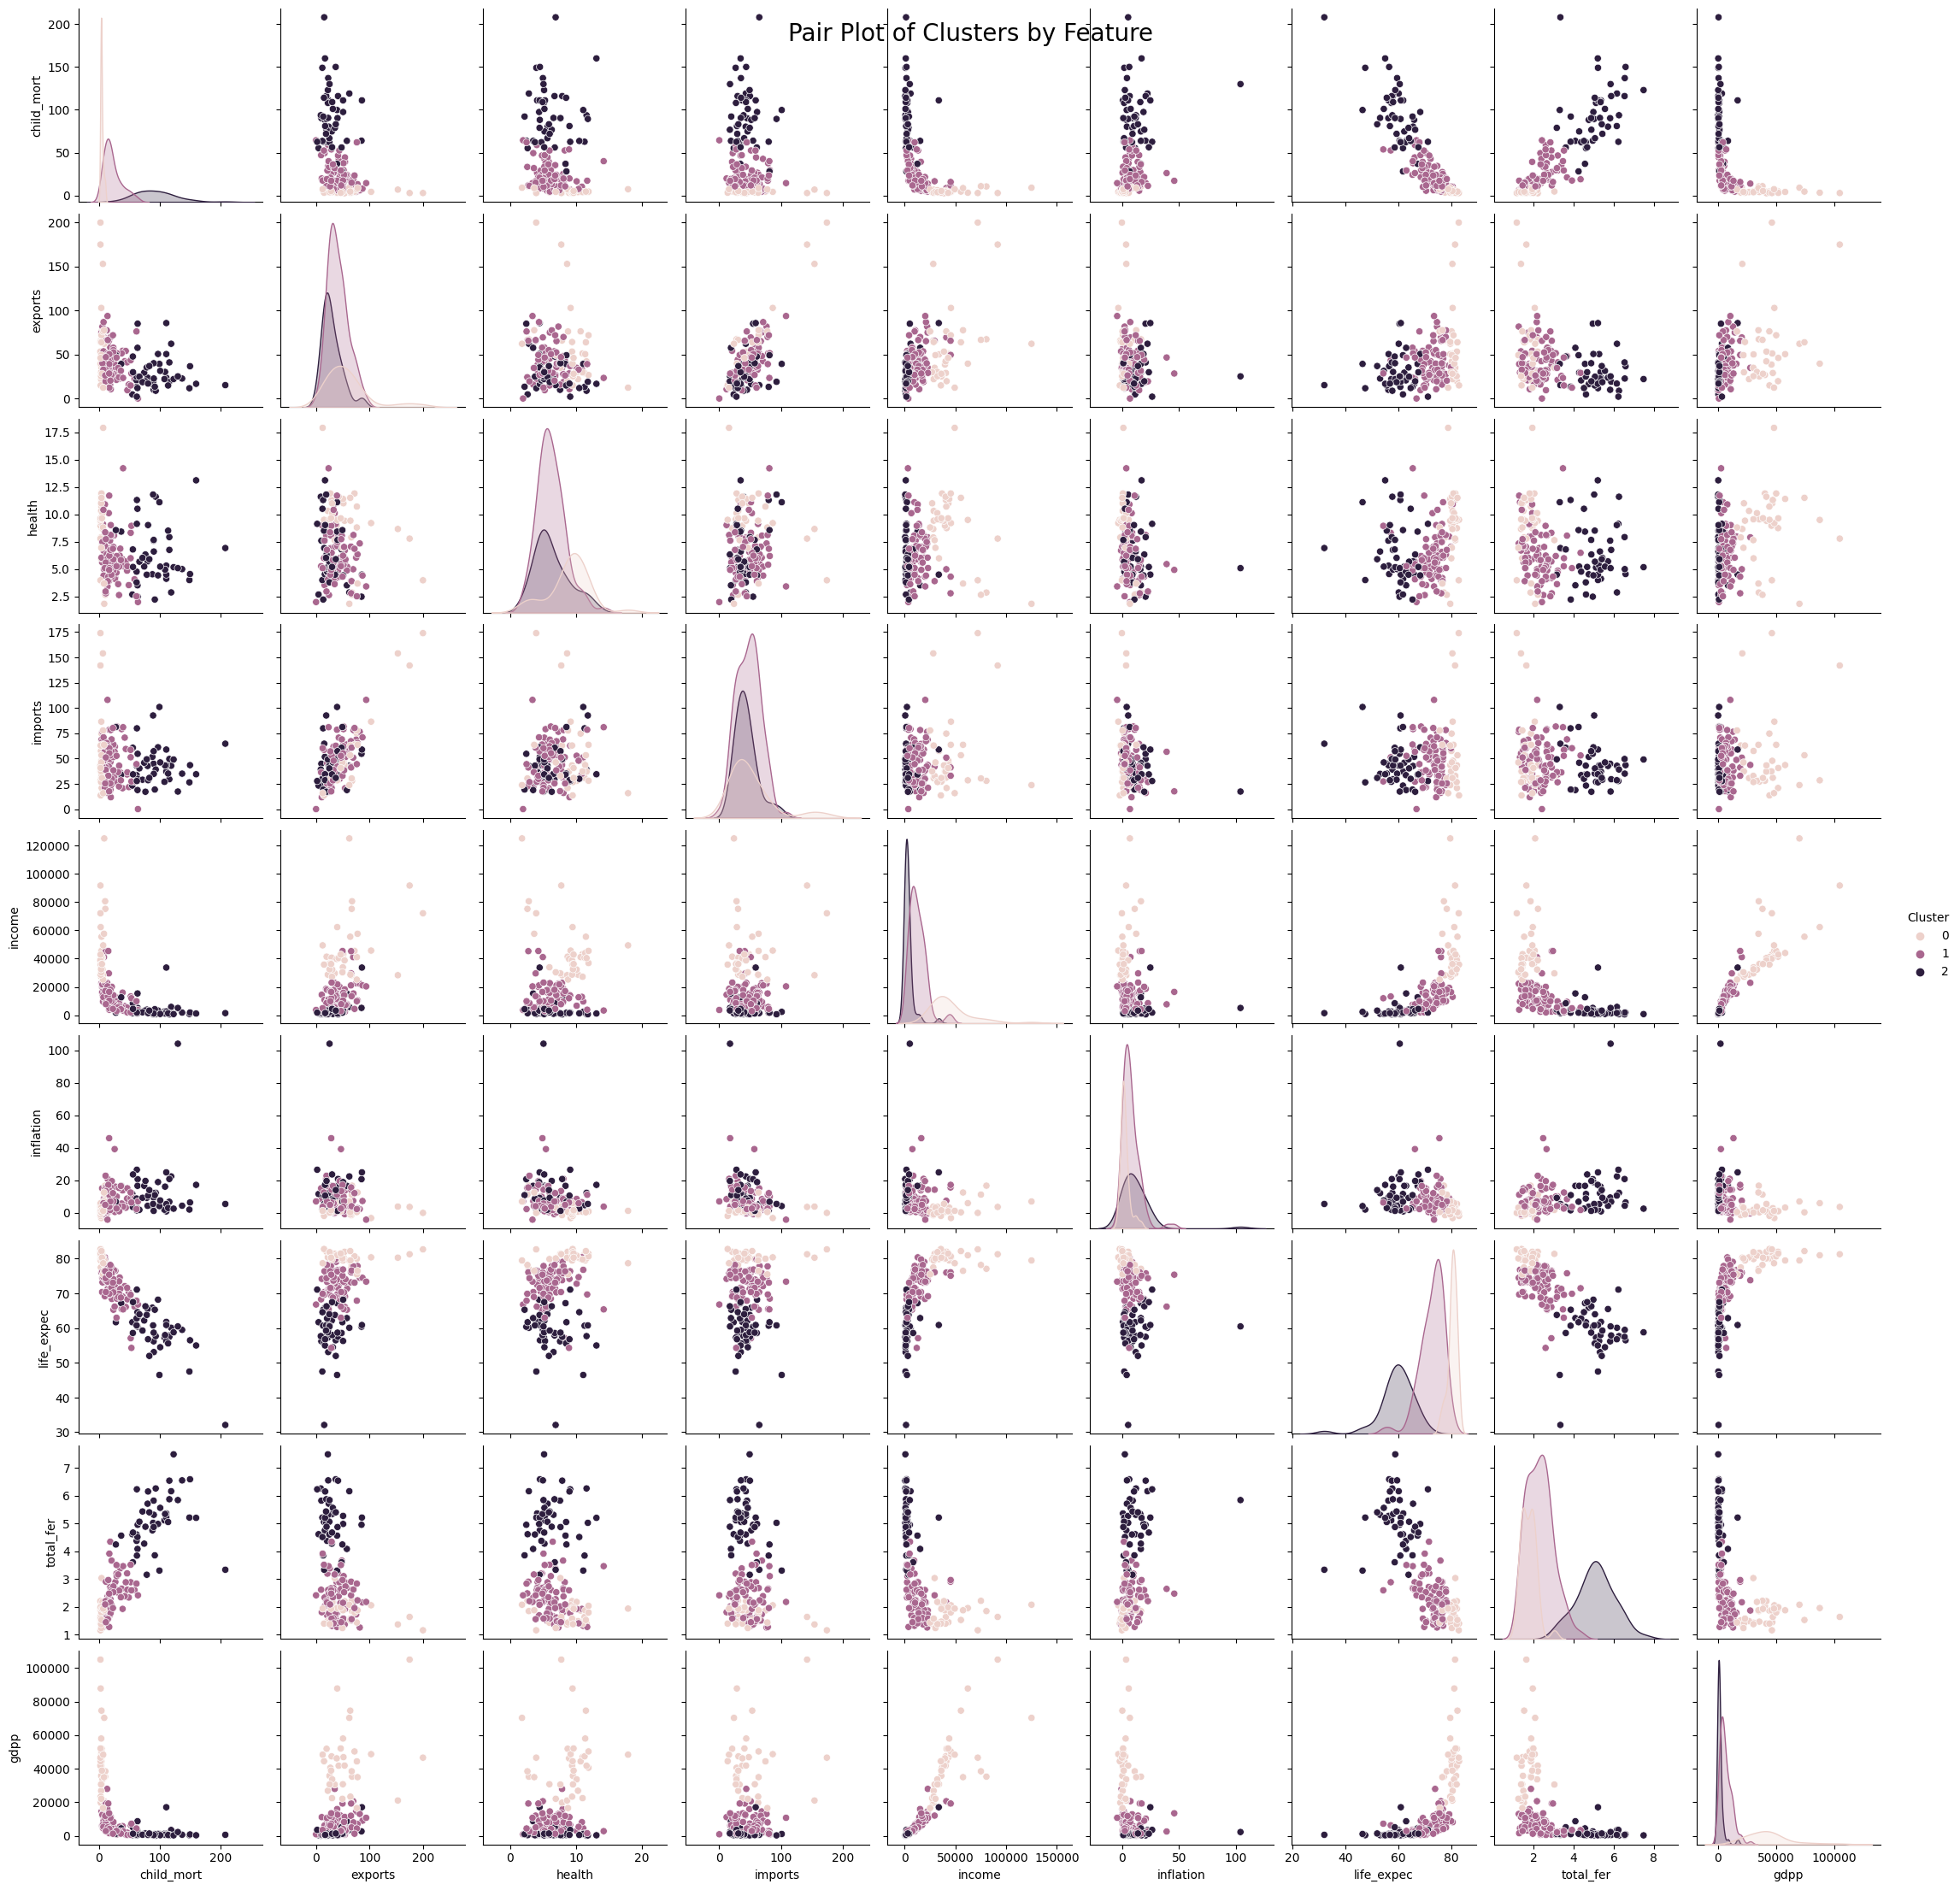

In [368]:
sns.get_dataset_names()


sns.load_dataset('penguins')
sns.pairplot(data, hue="Cluster")


plt.suptitle('Pair Plot of Clusters by Feature',
             size = 20);

In [370]:
clusters_table = pd.pivot_table(data, index=['Cluster'])
clusters_table

<ipython-input-370-721622f1faaf>:1: FutureWarning:

pivot_table dropped a column because it failed to aggregate. This behavior is deprecated and will raise in a future version of pandas. Select only the columns that can be aggregated.



,child_mort,exports,gdpp,health,imports,income,inflation,life_expec,total_fer
Cluster,,,,,,,,,
0,4.897143,58.431429,43117.142857,8.917429,51.508571,45802.857143,2.535000,80.245714,1.741143
1,22.425581,40.382430,6719.790698,6.215581,46.932162,12770.813953,7.609023,72.582558,2.293256
2,93.284783,29.287174,1695.913043,6.338478,43.297826,3516.804348,12.097065,59.393478,5.090217


In [358]:
df_with_labels['Status'] = df_with_labels['Cluster']

In [359]:
mapping = {1: 'Stable', 0: 'Do not need help', 2: 'Need Help'}
df_with_labels['Status'] = df_with_labels['Status'].replace(mapping)

In [360]:
df_with_labels

,Country,PC1,PC2,PC3,PC4,PC5,Cluster,Status
0,Afghanistan,0.599065,0.095506,0.157437,0.024382,0.042560,2,Need Help
1,Albania,-0.158455,-0.212345,-0.063709,0.061067,-0.017134,1,Stable
2,Algeria,-0.003661,-0.135842,-0.133938,-0.133376,0.092225,1,Stable
3,Angola,0.650272,0.276016,-0.143024,-0.155593,0.083921,2,Need Help
4,Antigua and Barbuda,-0.200684,-0.065162,-0.100418,0.037680,0.030574,1,Stable
...,...,...,...,...,...,...,...,...
162,Vanuatu,0.160056,-0.030100,-0.121936,0.065807,0.007747,1,Stable
163,Venezuela,-0.061196,-0.169616,-0.058942,-0.245296,0.112279,1,Stable
164,Vietnam,-0.115510,-0.032083,-0.195224,0.232604,0.040592,1,Stable
165,Yemen,0.332967,-0.019417,-0.030055,-0.104661,0.145588,2,Need Help


In [361]:
fig = px.choropleth(df_with_labels[['Country','Cluster']],
                    locationmode = 'country names',
                    locations = 'Country',
                    color = df_with_labels['Status'],
                    color_discrete_map = {'Do not need help': 'Green',
                                          'Stable':'Yellow',
                                          'Need Help':'Red'}
                   )

fig.update_layout(
        margin = dict(
                l=0,
                r=0,
                b=0,
                t=0,
                pad=2,
            ),
    )
fig.show()

In [381]:
status = 'Need Help'

# Filter rows
filtered_df = df_with_labels.loc[df_with_labels['Status'] == status]
filtered_df = filtered_df.drop(columns = ['PC1', 'PC2','PC3','PC4','PC5', "Cluster"])

print(filtered_df)

                      Country     Status
0                 Afghanistan  Need Help
3                      Angola  Need Help
17                      Benin  Need Help
25               Burkina Faso  Need Help
26                    Burundi  Need Help
28                   Cameroon  Need Help
31   Central African Republic  Need Help
32                       Chad  Need Help
36                    Comoros  Need Help
37           Congo, Dem. Rep.  Need Help
38                Congo, Rep.  Need Help
40              Cote d'Ivoire  Need Help
49          Equatorial Guinea  Need Help
50                    Eritrea  Need Help
55                      Gabon  Need Help
56                     Gambia  Need Help
59                      Ghana  Need Help
63                     Guinea  Need Help
64              Guinea-Bissau  Need Help
66                      Haiti  Need Help
72                       Iraq  Need Help
80                      Kenya  Need Help
81                   Kiribati  Need Help
84              